Бобровская Наталия, 491 группа

$\textbf{2 Применение решающего дерева}$

In [37]:
import numpy as np
import pydotplus
import matplotlib.pyplot as plt

from sklearn import tree
from IPython.display import Image
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [10]:
dataset, target = [], []

with open('german.data-numeric.txt') as f:
    for line in f:
        dataset.append(line.split()[:-1])
        target += line.split()[-1]
print dataset[0]
print '///'
print target[0]

['1', '6', '4', '12', '5', '5', '3', '4', '1', '67', '3', '2', '1', '2', '1', '0', '0', '1', '0', '0', '1', '0', '0', '1']
///
1


Последующее описание признаков скопировано из описания датасета

Description of the German credit dataset.

7.  Attribute description for german

Attribute 1:  (qualitative)
	       Status of existing checking account
               A11 :      ... <    0 DM
	       A12 : 0 <= ... <  200 DM
	       A13 :      ... >= 200 DM /
		     salary assignments for at least 1 year
               A14 : no checking account

Attribute 2:  (numerical)
	      Duration in month

Attribute 3:  (qualitative)
	      Credit history
	      A30 : no credits taken/
		    all credits paid back duly
              A31 : all credits at this bank paid back duly
	      A32 : existing credits paid back duly till now
              A33 : delay in paying off in the past
	      A34 : critical account/
		    other credits existing (not at this bank)

Attribute 4:  (qualitative)
	      Purpose
	      A40 : car (new)
	      A41 : car (used)
	      A42 : furniture/equipment
	      A43 : radio/television
	      A44 : domestic appliances
	      A45 : repairs
	      A46 : education
	      A47 : (vacation - does not exist?)
	      A48 : retraining
	      A49 : business
	      A410 : others

Attribute 5:  (numerical)
	      Credit amount

Attibute 6:  (qualitative)
	      Savings account/bonds
	      A61 :          ... <  100 DM
	      A62 :   100 <= ... <  500 DM
	      A63 :   500 <= ... < 1000 DM
	      A64 :          .. >= 1000 DM
              A65 :   unknown/ no savings account

Attribute 7:  (qualitative)
	      Present employment since
	      A71 : unemployed
	      A72 :       ... < 1 year
	      A73 : 1  <= ... < 4 years  
	      A74 : 4  <= ... < 7 years
	      A75 :       .. >= 7 years

Attribute 8:  (numerical)
	      Installment rate in percentage of disposable income

Attribute 9:  (qualitative)
	      Personal status and sex
	      A91 : male   : divorced/separated
	      A92 : female : divorced/separated/married
              A93 : male   : single
	      A94 : male   : married/widowed
	      A95 : female : single

Attribute 10: (qualitative)
	      Other debtors / guarantors
	      A101 : none
	      A102 : co-applicant
	      A103 : guarantor

Attribute 11: (numerical)
	      Present residence since

Attribute 12: (qualitative)
	      Property
	      A121 : real estate
	      A122 : if not A121 : building society savings agreement/
				   life insurance
              A123 : if not A121/A122 : car or other, not in attribute 6
	      A124 : unknown / no property

Attribute 13: (numerical)
	      Age in years

Attribute 14: (qualitative)
	      Other installment plans 
	      A141 : bank
	      A142 : stores
	      A143 : none

Attribute 15: (qualitative)
	      Housing
	      A151 : rent
	      A152 : own
	      A153 : for free

Attribute 16: (numerical)
              Number of existing credits at this bank

Attribute 17: (qualitative)
	      Job
	      A171 : unemployed/ unskilled  - non-resident
	      A172 : unskilled - resident
	      A173 : skilled employee / official
	      A174 : management/ self-employed/
		     highly qualified employee/ officer

Attribute 18: (numerical)
	      Number of people being liable to provide maintenance for

Attribute 19: (qualitative)
	      Telephone
	      A191 : none
	      A192 : yes, registered under the customers name

Attribute 20: (qualitative)
	      foreign worker
	      A201 : yes
	      A202 : no

In [11]:
model = tree.DecisionTreeClassifier()
model.fit(dataset, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

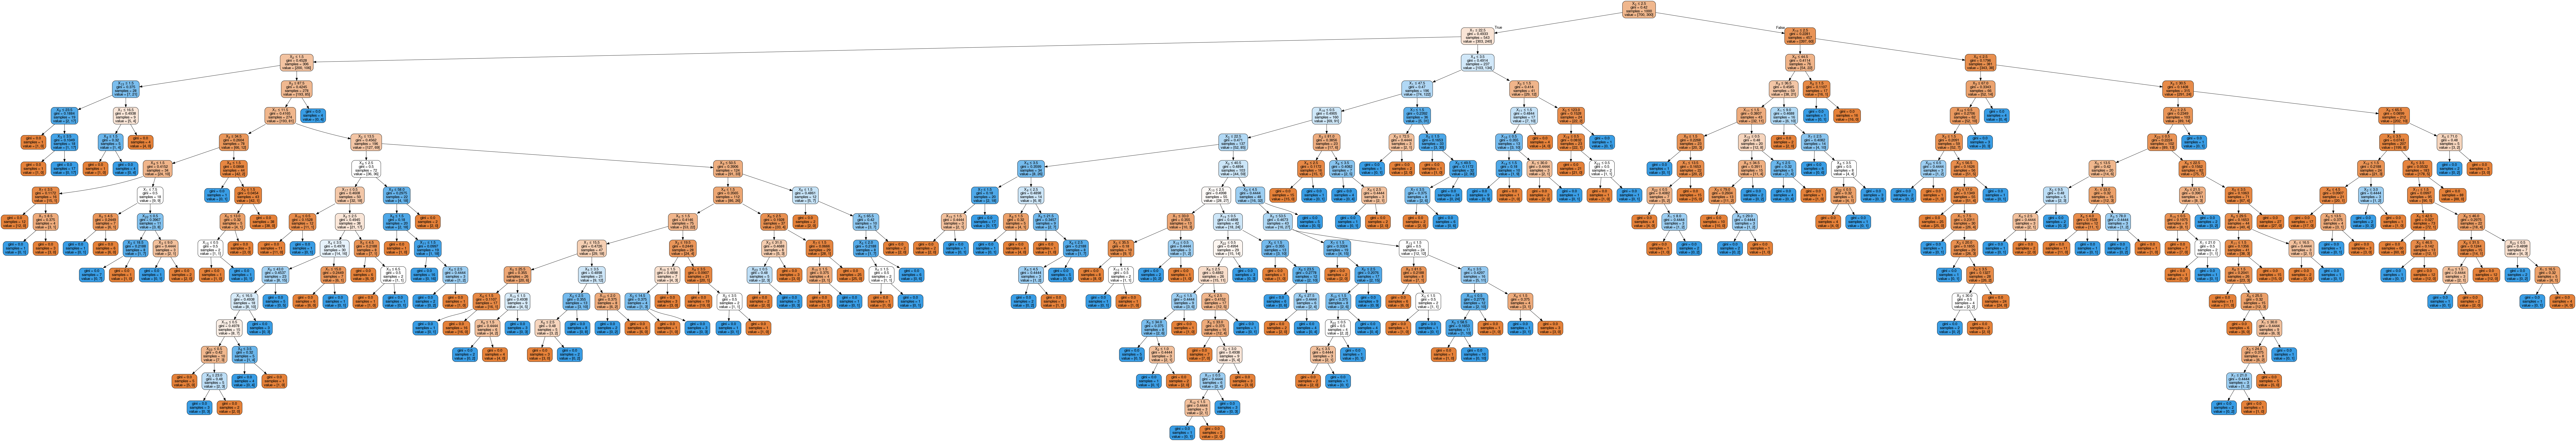

In [16]:
dot_data = tree.export_graphviz(model, out_file="big_tree.out", 
                         filled=True, rounded=True,  
                         special_characters=True)

graph = pydotplus.graphviz.graph_from_dot_file("big_tree.out")  
Image(graph.create_png())

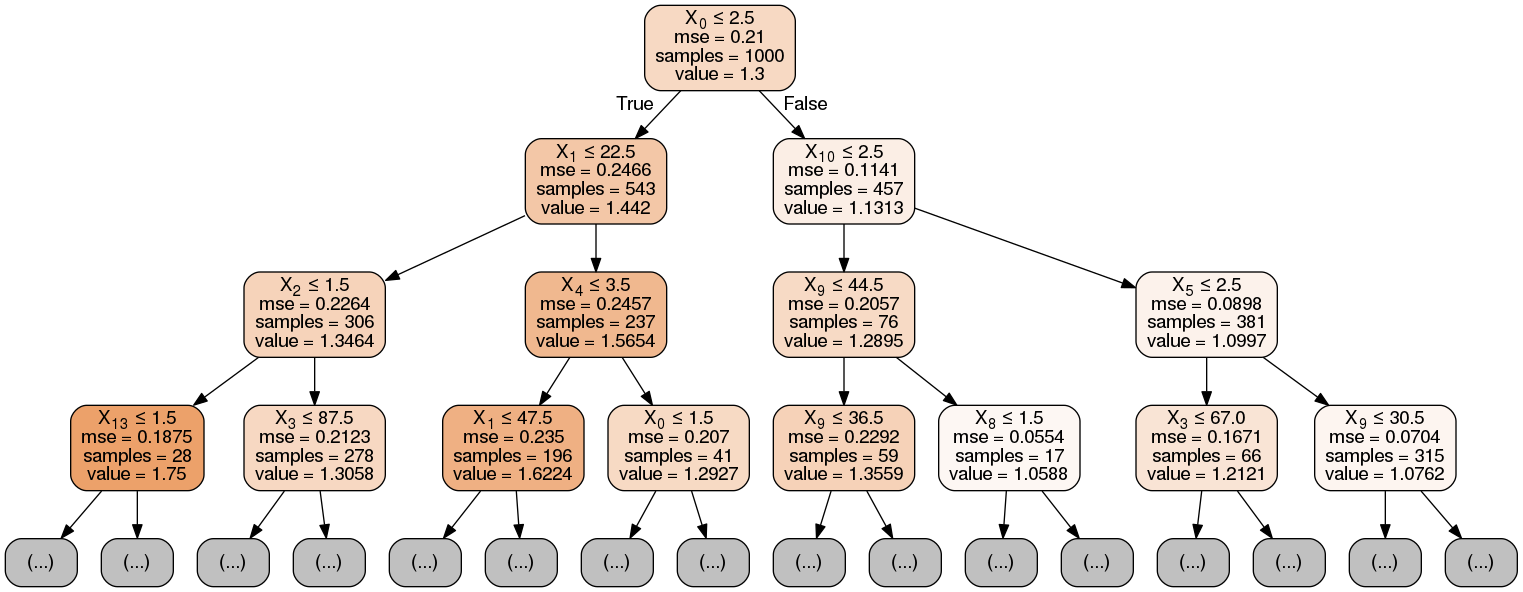

In [22]:
model = tree.DecisionTreeClassifier()
model.fit(dataset, target)
dot_data = tree.export_graphviz(model, out_file="big_tree.out", max_depth = 3,
                         filled=True, rounded=True,  
                         special_characters=True)

graph = pydotplus.graphviz.graph_from_dot_file("big_tree.out")  
Image(graph.create_png())

Интерпретация (описание признаков есть выше)

1 уровень: 

TRUE - аккаунты с DM < 200, FALSE - аккаунты с DM >= 200 или аккаунта не существует.

2 уровень: 

1 лист: количество месяцев выплат: TRUE - duration<=22, FALSE - >22

2 лист: нынешнее место жительства: TRUE - <= 2 года, FALSE - больше 2 лет

Max accuracy 0.70300540061
Depth with max accuracy 14


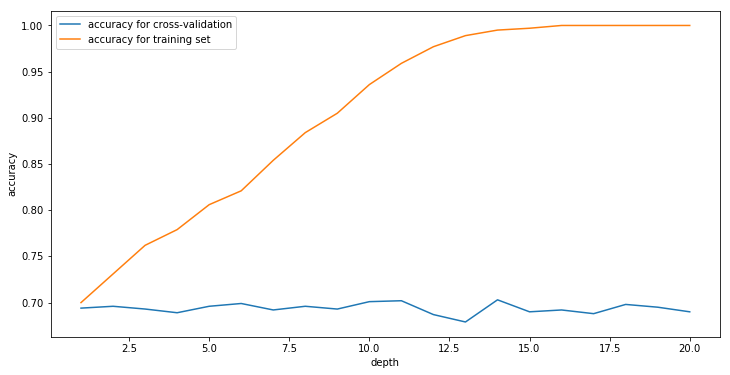

In [41]:
#Постройте графики зависимости качества на кросс-валидации и на обучающей выборке от глубины дерева
N = 20

accuracy = np.zeros(N)
accuracy_train = np.zeros(N)

for i in range (N + 1)[1:]:
    model = tree.DecisionTreeClassifier(max_depth = i)
    model.fit(dataset, target)
    accuracy_train[i - 1] = accuracy_score(target, model.predict(dataset))
    accuracy[i - 1] = np.mean(cross_val_score(estimator, dataset, target))

#print accuracy
print 'Max accuracy', np.max(accuracy)
print 'Depth with max accuracy', np.argmax(accuracy) + 1

plt.figure(figsize=(12, 6))
plt.xlabel("depth")
plt.ylabel("accuracy")
plt.plot(np.arange(N+1)[1:], accuracy, label = "accuracy for cross-validation")
plt.plot(np.arange(N+1)[1:], accuracy_train, label = "accuracy for training set")
plt.legend(loc = 'best')
plt.show()